# Day 13. Task 06
# Кластеризация

## 0. Импорты

In [326]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Препроцессинг

**1. Загрузите файл из: `datasets/regression.csv`.**

In [327]:
df = pd.read_csv('../data/regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667
5,user_19,118,16.0,-98.750000
6,user_21,65,10.0,-95.500000
7,user_25,79,179.0,-92.600000
8,user_28,60,149.0,-86.400000
9,user_3,18,317.0,-105.400000


**2. Удалите столбец `pageviews`. Вы будете кластеризировать пользователей только по двум признакам: количеству коммитов и их средней разнице.**

In [328]:
df = df.drop(columns='pageviews')
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


In [329]:
X = df[['num_commits', 'AVG(diff)']].values
X

array([[  62.        ,  -64.4       ],
       [  20.        ,  -74.8       ],
       [  61.        , -159.        ],
       [  51.        ,  -61.6       ],
       [   5.        ,   -5.66666667],
       [ 118.        ,  -98.75      ],
       [  65.        ,  -95.5       ],
       [  79.        ,  -92.6       ],
       [  60.        ,  -86.4       ],
       [  18.        , -105.4       ],
       [  34.        , -145.25      ],
       [   7.        ,   -2.        ],
       [  86.        ,  -89.        ],
       [  52.        ,  -48.5       ],
       [  23.        ,  -17.5       ],
       [  41.        ,  -39.33333333],
       [  46.        , -137.2       ],
       [  57.        ,  -27.        ],
       [   5.        , -141.4       ],
       [   6.        ,  -84.        ],
       [  37.        , -223.6       ],
       [  36.        ,  -52.33333333],
       [  27.        ,   -5.33333333],
       [  51.        , -157.4       ],
       [ 128.        , -104.75      ],
       [  40.        , -1

## 2. KMeans

**1. Изучите документацию о том, как работает этот алгоритм.**

- [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- [2.3. Кластеризация](https://scikit-learn.org/stable/modules/clustering.html)

**2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `random_state=21` и `n_clusters=3`.**

In [330]:
from sklearn.cluster import KMeans

In [331]:
kmeans = KMeans(n_clusters=3, random_state=21).fit(X)

**3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.**

-[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

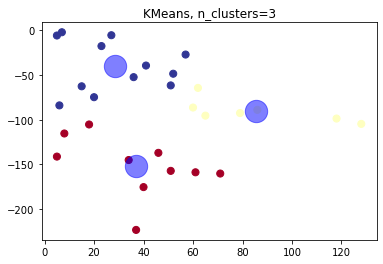

In [332]:
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,
            s=50, cmap='RdYlBu');

centers = kmeans.cluster_centers_
plt.title("KMeans, n_clusters=3")
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=500, alpha=0.5);

**4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.**

In [333]:
kmeans_8 = KMeans(n_clusters=8, random_state=21).fit(X)

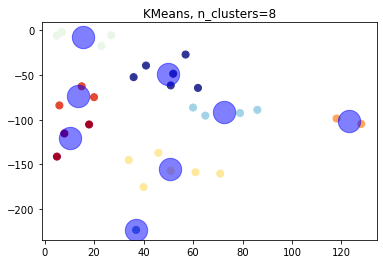

In [334]:
y_kmeans_8 = kmeans_8.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_8,
            s=50, cmap='RdYlBu'); # 'viridis', 'gist_rainbow'

centers = kmeans_8.cluster_centers_
plt.title("KMeans, n_clusters=8")
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=500, alpha=0.5);

In [335]:
kmeans_5 = KMeans(n_clusters=5, random_state=21).fit(X)

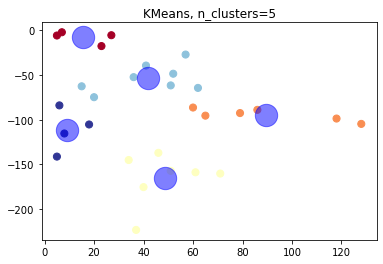

In [336]:
y_kmeans_5 = kmeans_5.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_5,
            s=50, cmap='RdYlBu'); # 'viridis', 'gist_rainbow'

centers = kmeans_5.cluster_centers_
plt.title("KMeans, n_clusters=5")
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=500, alpha=0.5);

**5. Посчитайте `silhouette_score` для них (изучите документацию по этой метрике).**

-[sklearn.metrics.silhouette_score¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [337]:
from sklearn.metrics import silhouette_score

In [338]:
silhouette_score(X, y_kmeans) # n_clusters=3

0.4390170957153295

In [339]:
silhouette_score(X, y_kmeans_8)

0.5077985556562201

In [340]:
silhouette_score(X, y_kmeans_5)

0.44641001650786977

## 3. DBSCAN

**1. Изучите документацию о том, как работает этот алгоритм.**

- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `eps=20` и `min_samples=2`.**

In [341]:
from sklearn.cluster import DBSCAN

In [342]:
clustering = DBSCAN(eps=20, min_samples=2).fit(X)

In [343]:
#clustering.labels_

In [344]:
#clustering.fit_predict(X)

**3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.**

Text(0.5, 1.0, 'DBSCAN, eps=20, min_samples=2')

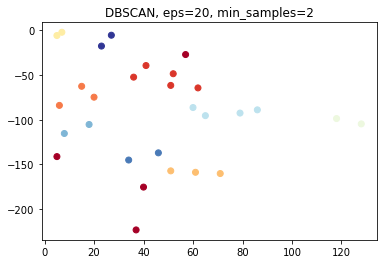

In [345]:
y_clustering = clustering.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_clustering, cmap='RdYlBu')
plt.title("DBSCAN, eps=20, min_samples=2")

**4. Попробуйте разные значения `eps` и `min_samples` и посмотрите, как изменится ваш график.**

In [346]:
clustering_22_1 = DBSCAN(eps=22, min_samples=1).fit(X)

Text(0.5, 1.0, 'DBSCAN, eps=22, min_samples=1')

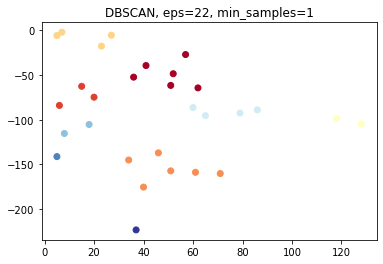

In [347]:
y_clustering_22_1 = clustering_22_1.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_clustering_22_1, cmap='RdYlBu')
plt.title("DBSCAN, eps=22, min_samples=1")

In [348]:
clustering_30_2 = DBSCAN(eps=30, min_samples=2).fit(X)

Text(0.5, 1.0, 'DBSCAN, eps=30, min_samples=2')

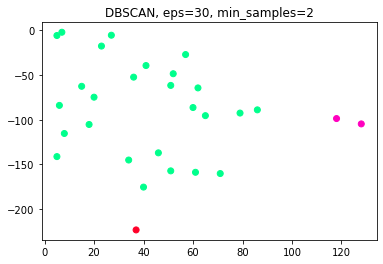

In [349]:
y_clustering_30_2 = clustering_30_2.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_clustering_30_2, cmap='gist_rainbow')
plt.title("DBSCAN, eps=30, min_samples=2")

**5. Посчитайте `silhouette_score` для них.**

In [350]:
silhouette_score(X, y_clustering) # eps=20, min_samples=2

0.38339641455696616

In [351]:
silhouette_score(X, y_clustering_22_1) # eps=22, min_samples=1

0.48713041554757475

In [352]:
silhouette_score(X, y_clustering_30_2) # eps=30, min_samples=2

0.19881722125199422

## 4. Иерархическая кластеризация (AgglomerativeClustering)

**1. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `n_clusters=5`.**

- [sklearn.cluster.AgglomerativeClustering¶](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [353]:
from sklearn.cluster import AgglomerativeClustering

In [354]:
clustering = AgglomerativeClustering(n_clusters=5).fit(X)

**2. Визуализируйте полученные данные и кластеры, используя `scatter plot`.**

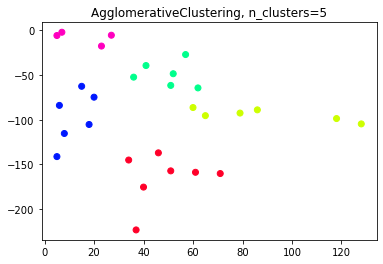

In [355]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='gist_rainbow')
plt.title("AgglomerativeClustering, n_clusters=5")
plt.show()

**3. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.**

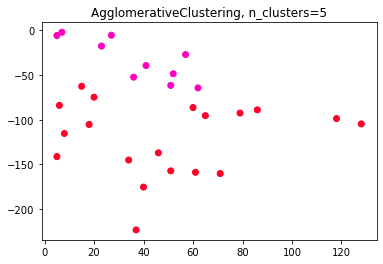

In [356]:
clustering_2 = AgglomerativeClustering(n_clusters=2).fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering_2.labels_, cmap='gist_rainbow')
plt.title("AgglomerativeClustering, n_clusters=5")
plt.show()

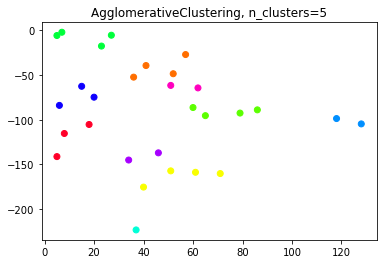

In [357]:
clustering_10 = AgglomerativeClustering(n_clusters=10).fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering_10.labels_, cmap='gist_rainbow')
plt.title("AgglomerativeClustering, n_clusters=5")
plt.show()

**4. Посчитайте `silhouette_score` для них.**

In [358]:
silhouette_score(X, clustering.labels_) # n_clusters=5

0.46383015199381467

In [359]:
silhouette_score(X, clustering_2.labels_) # n_clusters=2

0.35902490572221984

In [360]:
silhouette_score(X, clustering_10.labels_) # n_clusters=10

0.431193930539333

**5. Визуализируйте дендрограмму (`dendrogram`).**

- [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

- [Постройте дендрограмму с помощью sklearn.AgglomerativeClustering](https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering)

In [367]:
from scipy.cluster.hierarchy import dendrogram, linkage

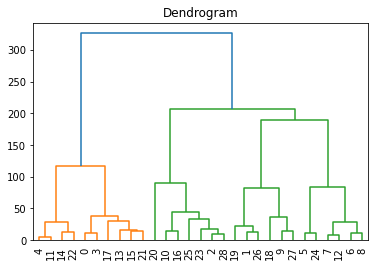

In [368]:
Z = linkage(X, method = 'ward')

dendrogram(Z)

plt.title("Dendrogram")
plt.xticks(rotation=90) 
plt.show()

## 5. Функция

Напишите функцию, которая:
1. Принимает в качестве аргументов: класс модели кластеризации, его параметры, название параметра для оптимизации, интервал значений для перебора вариантов и датасет.
2. Пробует различные значения из этого интервала для заданного параметра и рассчитывает `silhouette_score` для каждого нового значения.
3. Определяет лучшее значение параметра из интервала с точки зрения этой метрики.
4. Возвращает два графика:
    - первый показывает, как `silhouette_score` менялся в зависимости от изменения параметра,
    - второй показывает данные и кластера на `scatter plot` для наилучшего значения из интервала.

In [369]:
def function (model_class, params_class, params_optimize, interval, df):
   
    scores = []
    for i in interval:
        params_class[params_optimize] = i
        
        model = model_class(**params_class).fit(df)
        labels = model.labels_
        
        if len(labels) < 2: #оценка требуется из последних двух кластеров
            new_scores = 0
        else:
            new_scores = silhouette_score(df, labels)
        scores.append(new_scores)
        
    best_scores = scores.index(max(scores))
    params_class[params_optimize] = interval[best_scores]
        
    model = model_class(**params_class).fit(df)
    labels = model.labels_
    
    #plotting
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(interval, scores, color="red")
    ax2.scatter(df[:, 0], df[:, 1], c=labels, cmap='RdYlBu')
    fig.set_figheight(8)
    fig.set_figwidth(17)
    ax1.title.set_text('Как silhouette_score меняется в зависимости от изменения параметров')
    ax2.title.set_text('Данные и кластера на scatter plot для наилучшего значения из интервала')
    ax1.xaxis.grid()
    plt.show()    

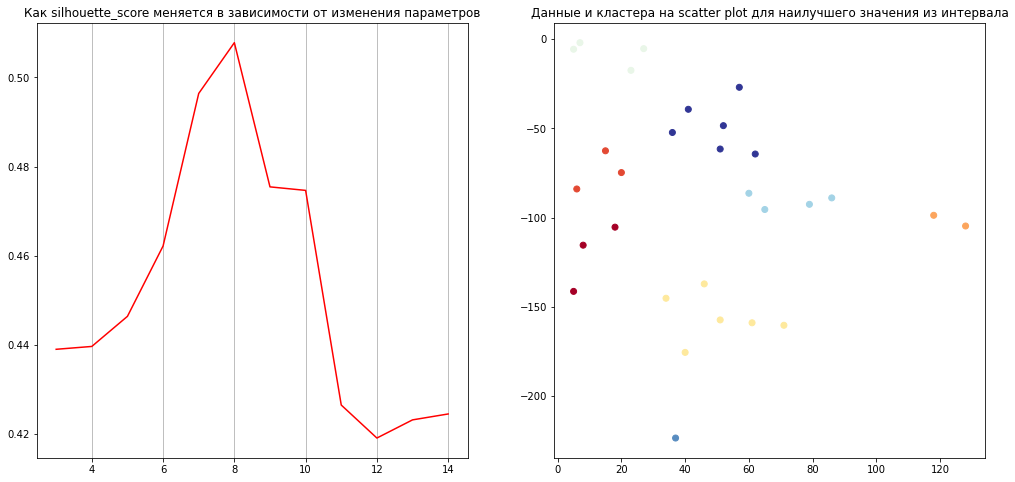

In [370]:
function(KMeans, {'random_state': 21},  'n_clusters', list(range(3, 15)), X)

**Лучшее значение параметра для оптимизации модели KMeans: n_clusters=8**

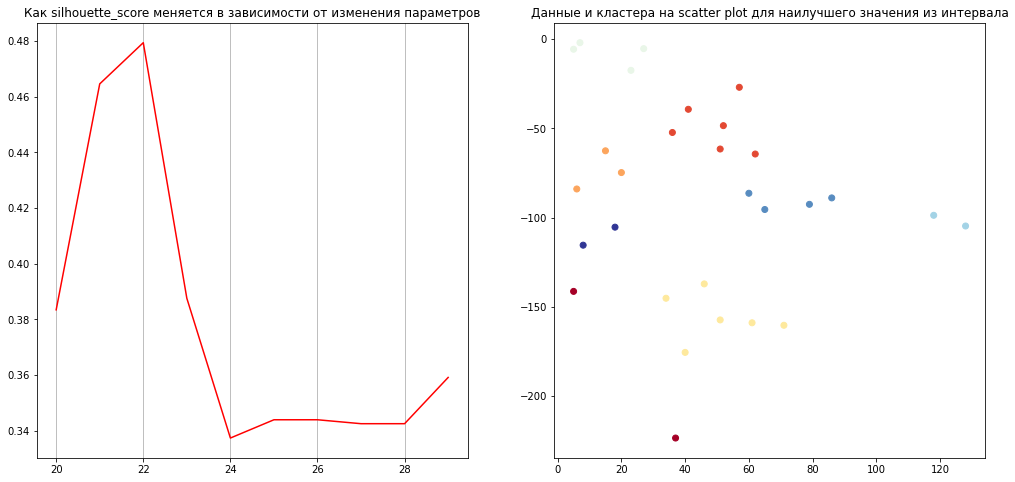

In [371]:
function(DBSCAN, {'min_samples': 2},  'eps', list(range(20, 30)), X)

**Лучшее значение параметра для оптимизации модели DBSCAN: eps=22**

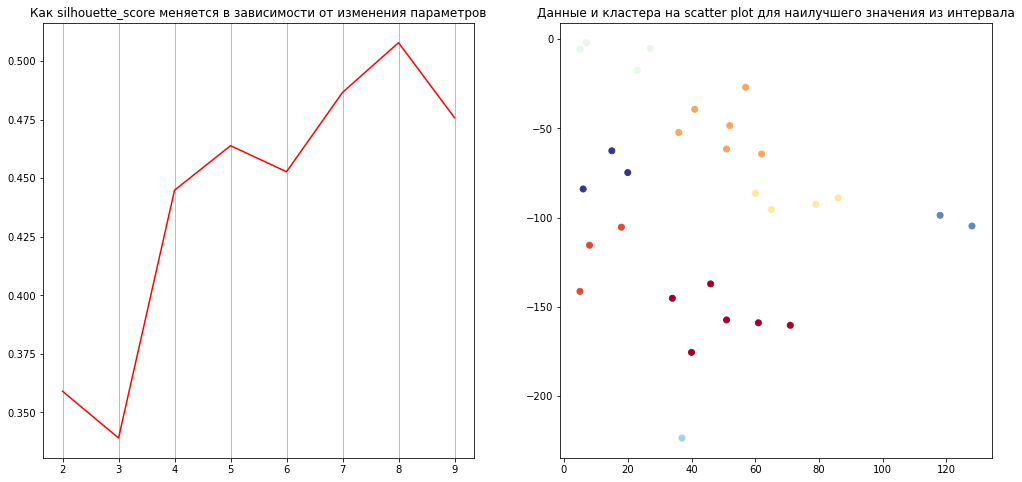

In [372]:
function(AgglomerativeClustering, {},  'n_clusters', list(range(2, 10)), X)

**Лучшее значение параметра для оптимизации модели AgglomerativeClustering: n_clusters=8**